In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_oil= pd.read_csv("data/Cushing_OK_WTI_Spot_Price_FOB_Daily.csv")

In [43]:
df_oil.head()

,Day,Series ID: PET.RWTC.D Dollars per Barrel
0,6/28/22,113.66
1,6/27/22,111.44
2,6/24/22,109.07
3,6/23/22,105.75
4,6/22/22,106.22


In [44]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Day                                       9206 non-null   object 
 1   Series ID: PET.RWTC.D Dollars per Barrel  9206 non-null   float64
dtypes: float64(1), object(1)
memory usage: 144.0+ KB


In [45]:
df_gas = pd.read_csv("data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv")

In [46]:
df_gas.head()

,Day,Series ID: NG.RNGWHHD.D Dollars per Million Btu
0,6/28/22,6.66
1,6/27/22,6.09
2,6/24/22,5.80
3,6/23/22,6.54
4,6/22/22,6.76


In [47]:
df = pd.merge(df_oil, df_gas, on=["Day"])

In [48]:
df.head()

,Day,Series ID: PET.RWTC.D Dollars per Barrel,Series ID: NG.RNGWHHD.D Dollars per Million Btu
0,6/28/22,113.66,6.66
1,6/27/22,111.44,6.09
2,6/24/22,109.07,5.80
3,6/23/22,105.75,6.54
4,6/22/22,106.22,6.76


In [49]:
df.tail()

,Day,Series ID: PET.RWTC.D Dollars per Barrel,Series ID: NG.RNGWHHD.D Dollars per Million Btu
6386,1/13/97,25.20,4.00
6387,1/10/97,26.15,3.92
6388,1/9/97,26.30,3.61
6389,1/8/97,26.55,3.80
6390,1/7/97,26.25,3.82


In [50]:
df.rename(columns = {'Series ID: PET.RWTC.D Dollars per Barrel':'WTI Oil', 'Series ID: NG.RNGWHHD.D Dollars per Million Btu':'Henry Hub Gas'}, inplace = True)

In [51]:
df.head()

,Day,WTI Oil,Henry Hub Gas
0,6/28/22,113.66,6.66
1,6/27/22,111.44,6.09
2,6/24/22,109.07,5.80
3,6/23/22,105.75,6.54
4,6/22/22,106.22,6.76


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 6390
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            6391 non-null   object 
 1   WTI Oil        6391 non-null   float64
 2   Henry Hub Gas  6390 non-null   float64
dtypes: float64(2), object(1)
memory usage: 199.7+ KB


In [53]:
df['Day'] = pd.to_datetime(df['Day'])

In [54]:
df = df.sort_values("Day")

In [55]:
df.head()

,Day,WTI Oil,Henry Hub Gas
6390,1997-01-07,26.25,3.82
6389,1997-01-08,26.55,3.80
6388,1997-01-09,26.30,3.61
6387,1997-01-10,26.15,3.92
6386,1997-01-13,25.20,4.00


In [56]:
df.rename(columns = {'Day':'Date' }, inplace = True)

<AxesSubplot:xlabel='Date'>

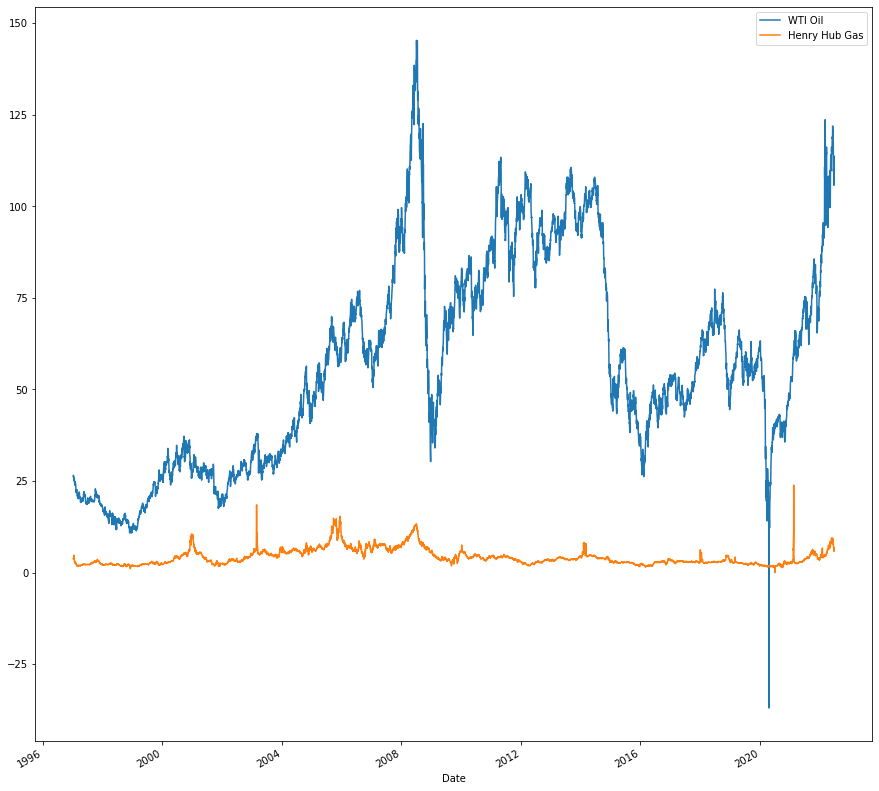

In [57]:
df.plot(x="Date", y=["WTI Oil", "Henry Hub Gas"], kind="line", figsize=(15, 15))

In [58]:
df_retail = pd.read_csv("data/PET_PRI_GND_DCUS_NUS_W.csv")

In [59]:
df_retail.head()

,Date,EIA Gasoline,Unnamed: 2
0,"Aug 20, 1990",1.191,NaN
1,"Aug 27, 1990",1.245,NaN
2,"Sep 03, 1990",1.242,NaN
3,"Sep 10, 1990",1.252,NaN
4,"Sep 17, 1990",1.266,NaN


In [60]:
df_retail.drop('Unnamed: 2', axis=1, inplace=True)

In [61]:
df_retail.head()

,Date,EIA Gasoline
0,"Aug 20, 1990",1.191
1,"Aug 27, 1990",1.245
2,"Sep 03, 1990",1.242
3,"Sep 10, 1990",1.252
4,"Sep 17, 1990",1.266


In [62]:
df_retail['Date'] = pd.to_datetime(df['Date'])

In [63]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1665 non-null   datetime64[ns]
 1   EIA Gasoline  1658 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.1 KB


In [64]:
df.head()

,Date,WTI Oil,Henry Hub Gas
6390,1997-01-07,26.25,3.82
6389,1997-01-08,26.55,3.80
6388,1997-01-09,26.30,3.61
6387,1997-01-10,26.15,3.92
6386,1997-01-13,25.20,4.00


In [65]:
df_retail.head()

,Date,EIA Gasoline
0,2022-06-28,1.191
1,2022-06-27,1.245
2,2022-06-24,1.242
3,2022-06-23,1.252
4,2022-06-22,1.266


In [66]:
df_retail = df_retail.sort_values("Date")

In [67]:
df_retail

,Date,EIA Gasoline
1664,2015-11-23,NaN
1663,2015-11-24,4.619
1662,2015-11-25,4.710
1661,2015-11-26,4.798
1660,2015-11-27,4.844
...,...,...
4,2022-06-22,1.266
3,2022-06-23,1.252
2,2022-06-24,1.242
1,2022-06-27,1.245


In [68]:
df = pd.merge(df, df_retail, on=["Date"])

In [69]:
df.head()

,Date,WTI Oil,Henry Hub Gas,EIA Gasoline
0,2015-11-23,39.27,2.18,NaN
1,2015-11-24,40.89,2.14,4.619
2,2015-11-25,41.22,2.14,4.710
3,2015-11-26,41.22,2.14,4.798
4,2015-11-27,40.57,2.14,4.844


In [70]:
df.head()

,Date,WTI Oil,Henry Hub Gas,EIA Gasoline
0,2015-11-23,39.27,2.18,NaN
1,2015-11-24,40.89,2.14,4.619
2,2015-11-25,41.22,2.14,4.710
3,2015-11-26,41.22,2.14,4.798
4,2015-11-27,40.57,2.14,4.844


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1665 non-null   datetime64[ns]
 1   WTI Oil        1665 non-null   float64       
 2   Henry Hub Gas  1664 non-null   float64       
 3   EIA Gasoline   1658 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 65.0 KB


<AxesSubplot:xlabel='Date'>

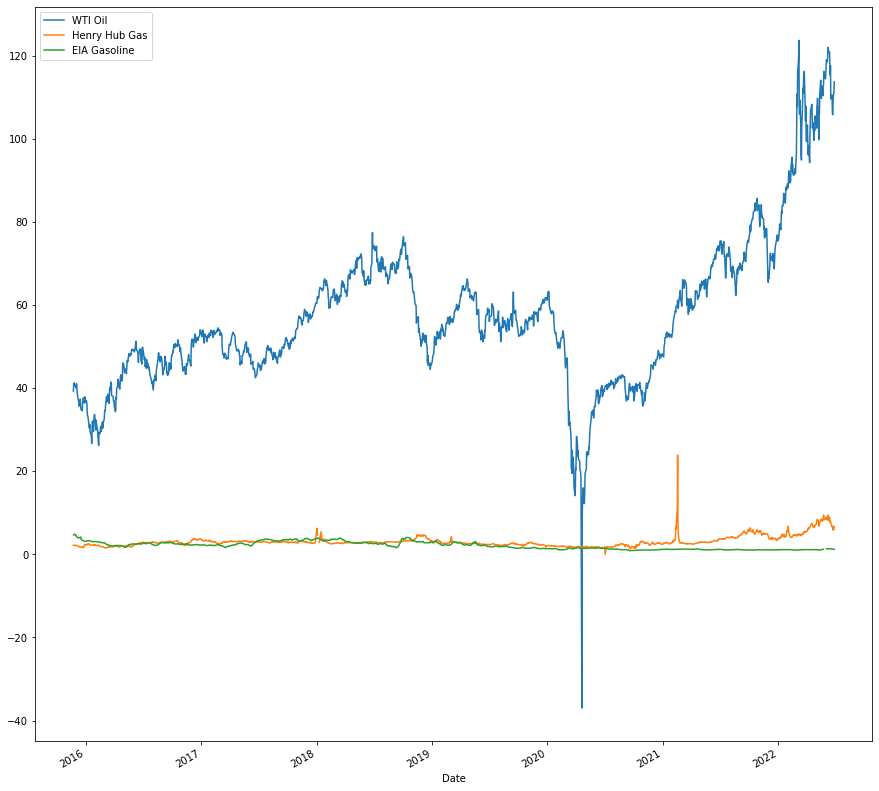

In [77]:
df.plot(x="Date", y=["WTI Oil", "Henry Hub Gas","EIA Gasoline"], kind="line", figsize=(15, 15))